In [1]:
#第三方库的导入
import re
import os
import requests
import lxml
from bs4 import BeautifulSoup
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
#词云
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image



In [2]:
# 分词
Df = pd.read_csv("./psanguo.csv", index_col=False, encoding="utf-8")
txt = []
for i in range(len(Df['para_txt'])):
    ls = jieba.lcut(Df['para_txt'][i], cut_all=False)
    ls = list(filter(lambda x: len(x) > 1, ls))
    txt.append(" ".join(ls))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.701 seconds.
Prefix dict has been built successfully.


In [3]:
role_dict = {"诸葛亮": 1924, "刘备": 1760, "曹操": 1978, "关羽": 855, "张飞": 358,
             "吕布": 306, "司马懿": 288, "赵云": 278, "孙权": 264, "周瑜": 217, "马超": 185, "袁绍": 191, }
excludes={"将军","却说","荆州","二人","不可","不能","如此"}
txt=open("./sanguo.txt","r",encoding='utf-8').read()
words=jieba.lcut(txt)
counts={}
for word in words:
    if len(word)==1:
        continue
    elif word == "诸葛亮" or word == "孔明曰" or word == "丞相" or word == "相父" or word == "亮" or word == "卧龙":
        reword="孔明"
    elif word == "关公" or word == "云长" or word == "关云长" or word == "刘豫州" or word == "备" or word == "皇叔":
        reword="关羽"
    elif word == "玄德" or word == "玄德曰" or word == "刘玄德" or word == "先主" or word == "主公" or word == "美髯公":
        reword="刘备"
    elif word == "孟德" or word == "曹丞相" or word == "曹公" or word == "操" or word == "曹贼" or word == "阿瞒" or word == "魏王" or word == "曹孟德" or word == "魏公":
        reword="曹操"
    elif word == "吕奉先" or word == "奉先" or word == "布" or word == "吕将军":
        reword = "吕布"
    elif word == "仲达" or word == "司马仲达" or word == "懿" or word == "司马":
        reword = "司马懿"
    else:
        reword=word
    counts[reword]=counts.get(reword,0)+1
for word in excludes:
    del(counts[word])
items=list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)
for i in range(10):
    word,count=items[i]
    print("{0:<10}{1:>5}".format(word,count)) 

孔明         1924
刘备         1828
曹操         1078
关羽          921
张飞          358
商议          344
如何          338
军士          317
吕布          306
左右          294


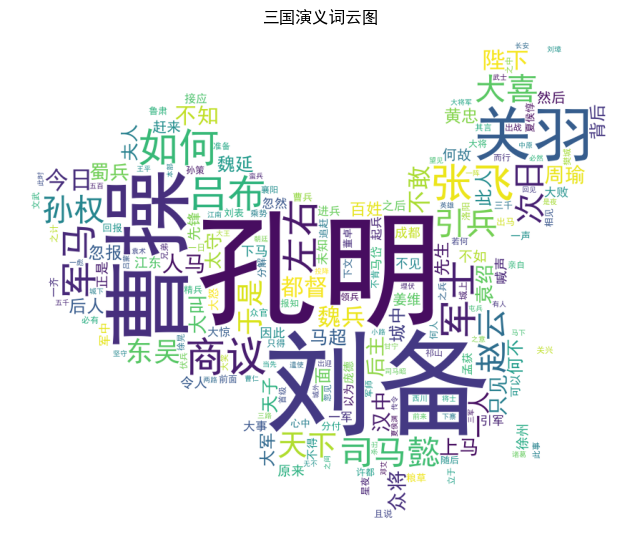

In [4]:
plt.rcParams["font.sans-serif"] = "SimHei"
plt.figure(figsize=(8,8))
role = dict(items)
bg_mask = np.array(Image.open("./C.png"))
img_color = ImageColorGenerator(bg_mask)
wordcc = WordCloud(font_path='simhei.ttf', mask=bg_mask,background_color="white").fit_words(role)
plt.imshow(bg_mask)
plt.imshow(wordcc)
plt.axis("off")
plt.title("三国演义词云图")
plt.show()

词语频数直方图

In [5]:
counts
name = []
num = []
for n in counts.keys():
    name.append(n)
for x in counts.values():
    num.append(x) 

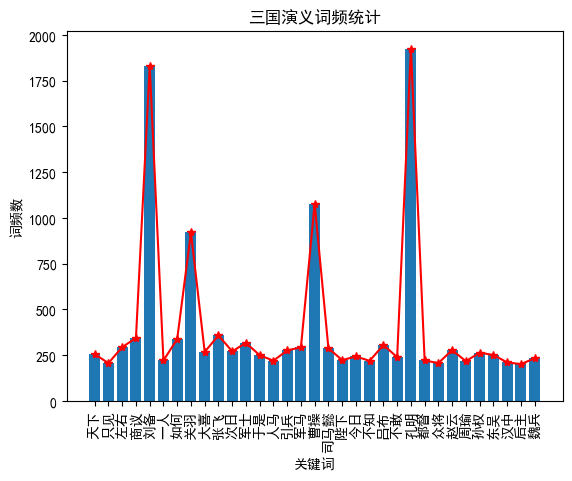

In [6]:
plt.rcParams["font.sans-serif"] = "SimHei"
dic = {
    "name":name,
    "num":num
}
df=pd.DataFrame(dic)
df['wordlen'] = df['name'].str.len()
new_data = df.loc[df['num'] > 200]
new_data = new_data.reset_index(drop=True)
new_data['name'].str.replace('\n','')
new_data
plt.bar(new_data['name'], new_data['num'],)
plt.plot(new_data['name'], new_data['num'],'r-*')
# plt.xticks(FontProperties = font,size = 10)
plt.xlabel("关键词")
plt.ylabel("词频数")
plt.title("三国演义词频统计")
plt.xticks(rotation=90)
plt.show()


人物关系网络分析：

In [7]:
import networkx as nx

In [ ]:
dict1 = {
    "First": ['曹操', '曹操', '曹操', '曹操', '曹操', '曹操', '曹操', '曹操', '曹操', '曹操',],
    "Second": ['刘备', '诸葛亮', '司马懿', '关羽', '曹丕', '孙权', '张飞', '袁绍', '赵云', '吕布',],
    "chapweight":[68.0,79.0,85.0,57.0,88.0,35.0,44.0,27.0,30.0,37.0],
    "duanweight": [340.0, 412.0, 553.0, 331.0, 576.0, 250.0, 288.0, 190.0, 240.0, 185.0]
}
r = pd.DataFrame(dict1)
r["weight"] = r['chapweight']/120
G = nx.Graph()
for i in r.index:
    G.add_edge(r.First[i],r.Second[i],weight=r.weight[i])
#定义边的类型
elarge = [ (u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > 0.3]
emiddle = [ (u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] > 0.2) & (d['weight'] <= 0.3)]
esmall = [ (u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= 0.2]
#图的布局
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=350)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2,alpha=0.9,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=emiddle,width=1.5,alpha=0.6,edge_color='y')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.3,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=10)
plt.axis("off")
plt.show()